In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Dataset =pd.read_excel('sample_data/scip_trust_all responses_quantitative-20190702.xlsx')

In [ ]:
Dataset.dtypes

Timestamp          datetime64[ns]
trust                       int64
sceptical                   int64
scpeticalR                  int64
TrustLevel                float64
                        ...      
C/R2                        int64
Neuroticism_r.1             int64
N/R2                        int64
Imagination_r.1             int64
I/R2                        int64
Length: 66, dtype: object

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 66 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Timestamp                                           111 non-null    datetime64[ns]
 1   trust                                               111 non-null    int64         
 2   sceptical                                           111 non-null    int64         
 3   scpeticalR                                          111 non-null    int64         
 4   TrustLevel                                          111 non-null    float64       
 5   TrustinBigtech                                      111 non-null    int64         
 6   TrustinCompanies                                    111 non-null    int64         
 7   TrustworthinessComp                                 111 non-null    int64         
 8   DiligenceC

In [ ]:
Dataset.isnull().sum(axis = 1).sum()

8

In [ ]:
Dataset.isnull().sum(axis = 0).any

<bound method Series.any of Timestamp          0
trust              0
sceptical          0
scpeticalR         0
TrustLevel         0
                  ..
C/R2               0
Neuroticism_r.1    0
N/R2               0
Imagination_r.1    0
I/R2               0
Length: 66, dtype: int64>

**bold text**

*   from the above we know that we have 8 missing values that we have to deal with .
      * the values are in evaluationAbility ,  extraversion , Neuroticism_r ,Imagination.1,Agreableness_r.1
      * we also realize that the missing values are for 5 separate persons and not just one.
      We will need to either drop the persons off the study or replace the missing values



In [ ]:
Dataset.head()

,Timestamp,trust,sceptical,scpeticalR,TrustLevel,TrustinBigtech,TrustinCompanies,TrustworthinessComp,DiligenceComp,generalTrust,ProviderTrust,evaluationAbility,useCar,trustCar,useBot,trustBot,risk,age,gender,nationality,living,expertiseAI,expertiseTech,education,profession,I generally trust people easily...,I generally trust technology easily...,I am generally rather pessimistic,I generally trust companies to do the right things,I generally trust people to do the right things,I am generally rather optimistic,Would you like to learn more about AI?,attitudeChange,sumExtra,sumAgree,sumNeuro,extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_r,E/R1,Agreableness_r,A/R1,Conscientiousness r),C/R1,Neuroticism_r,N/R1,Imagination.1,Extraversion,Agreableness,Conscientiousness.1,Neuroticism.1,Imagination_r,I/R1,Extraversion_r.1,E/R2,Agreableness_r.1,A/R2,Conscientiousness r).1,C/R2,Neuroticism_r.1,N/R2,Imagination_r.1,I/R2
0,2019-04-17 20:48:06.802,4,3,3,3.5,3,3,3,3,2,2.8,5.0,Yes,depends,no,yes,yes,45-50,male,American,Houston,8,10,Bachelor/ Master,Principal Engineer,3,4,1,2,3,5,no,1,10,19,7,2.0,5,3,1,5,3,3,1,5,3,3,3.0,3,1.0,2,5,3,1,1,5,3,3,2.0,4,2,4,4,2,1,5
1,2019-04-18 04:56:29.845,3,3,3,3.0,2,3,3,3,3,2.8,2.0,depends,depends,depends,yes,"Most intimately, probably no. We are already s...",50-60,female,Serbian /Canadian,Switzerland,6,9,Bachelor/ Master,Entrepreneur,5,4,2,3,4,4,yes,1,14,19,8,3.0,5,4,2,4,3,3,1,5,1,5,3.0,3,1.0,4,5,4,2,2,4,2,4,2.0,4,1,5,5,1,1,5
2,2019-04-18 07:01:05.196,3,3,3,3.0,3,3,2,3,4,3.0,3.0,depends,depends,no,no,"yes, this is humanity to use good things for b...",30-35,male,CH,CH,5,8,Bachelor/ Master,Engineer,5,4,1,4,4,5,yes,3,15,19,6,2.0,5,3,1,4,1,5,1,5,2,4,4.0,2,2.0,3,4,4,1,1,5,1,5,1.0,5,1,5,4,2,1,5
3,2019-04-18 10:45:57.087,2,4,2,2.0,2,1,3,4,1,2.2,3.0,depends,depends,yes,no,"I think the development might be inevitable, b...",30-35,female,Taiwan,Switzerland,6,7,Bachelor/ Master,PhD student,4,2,2,1,3,4,yes,1,8,13,10,3.0,4,3,1,2,4,2,3,3,2,4,3.0,3,3.0,1,3,5,3,3,3,4,2,3.0,3,1,5,3,3,3,3
4,2019-04-19 20:30:36.877,4,2,4,4.0,3,3,3,3,3,3.0,4.0,No,depends,no,no,yes,30-35,female,Frencg,Paris,7,6,Bachelor/ Master,"Account Manager at Snips, doing offline voice ...",3,4,3,3,3,3,yes,1,16,18,8,3.0,5,3,2,4,1,5,1,5,1,5,4.0,2,1.0,3,2,4,2,1,5,1,5,NaN,6,1,5,4,2,1,5


In [ ]:
Dataset.describe()

,trust,sceptical,scpeticalR,TrustLevel,TrustinBigtech,TrustinCompanies,TrustworthinessComp,DiligenceComp,generalTrust,ProviderTrust,evaluationAbility,expertiseAI,expertiseTech,I generally trust people easily...,I generally trust technology easily...,I am generally rather pessimistic,I generally trust companies to do the right things,I generally trust people to do the right things,I am generally rather optimistic,attitudeChange,sumExtra,sumAgree,sumNeuro,extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_r,E/R1,Agreableness_r,A/R1,Conscientiousness r),C/R1,Neuroticism_r,N/R1,Imagination.1,Extraversion,Agreableness,Conscientiousness.1,Neuroticism.1,Imagination_r,I/R1,Extraversion_r.1,E/R2,Agreableness_r.1,A/R2,Conscientiousness r).1,C/R2,Neuroticism_r.1,N/R2,Imagination_r.1,I/R2
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,109.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,109.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,110.000000,111.000000,110.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,109.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,3.189189,3.072072,2.927928,3.058559,2.720721,2.612613,2.252252,2.792793,2.576577,2.590991,2.651376,4.693694,6.666667,3.504505,3.315315,2.000000,2.576577,3.306306,3.945946,1.621622,13.000000,16.675676,10.234234,2.963303,4.252252,3.504505,2.144144,4.018018,2.567568,3.432432,1.837838,4.162162,2.144144,3.855856,3.345455,2.684685,1.754545,3.261261,4.018018,3.630631,2.351351,1.711712,4.288288,2.603604,3.396396,1.788991,4.243243,1.765766,4.234234,2.945946,3.054054,1.774775,4.225225
std,0.967786,1.033192,1.033192,0.880957,1.137551,0.945527,0.909230,1.071253,0.899995,0.756253,1.220019,2.239289,2.090382,1.060651,0.981483,0.972345,0.899995,0.979729,0.961418,1.027389,3.590391,3.042613,2.920009,1.017683,0.878723,0.989710,1.102451,0.924239,1.116990,1.116990,0.995814,0.995814,1.234702,1.234702,0.942730,0.990702,0.987875,1.203870,1.070106,1.035093,0.969054,0.743302,0.743302,1.055542,1.055542,0.923694,0.945960,0.914081,0.914081,1.181969,1.181969,1.050408,1.050408
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,10.500000,15.000000,8.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.500000,3.000000,2.000000,1.000000,4.000000,2.000000,3.000000,1.000000,4.000000,1.000000,4.000000,2.000000,2.000000,1.000000,4.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.600000,2.000000,5.000000,7.000000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,13.000000,17.000000,10.000000,3.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,1.000000,3.000000,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,1.000000,5.000000
75%,4.000000,4.000000,4.000000,3.500000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,7.000000,8.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,2.0

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11a7404d10>,
      dtype=object)

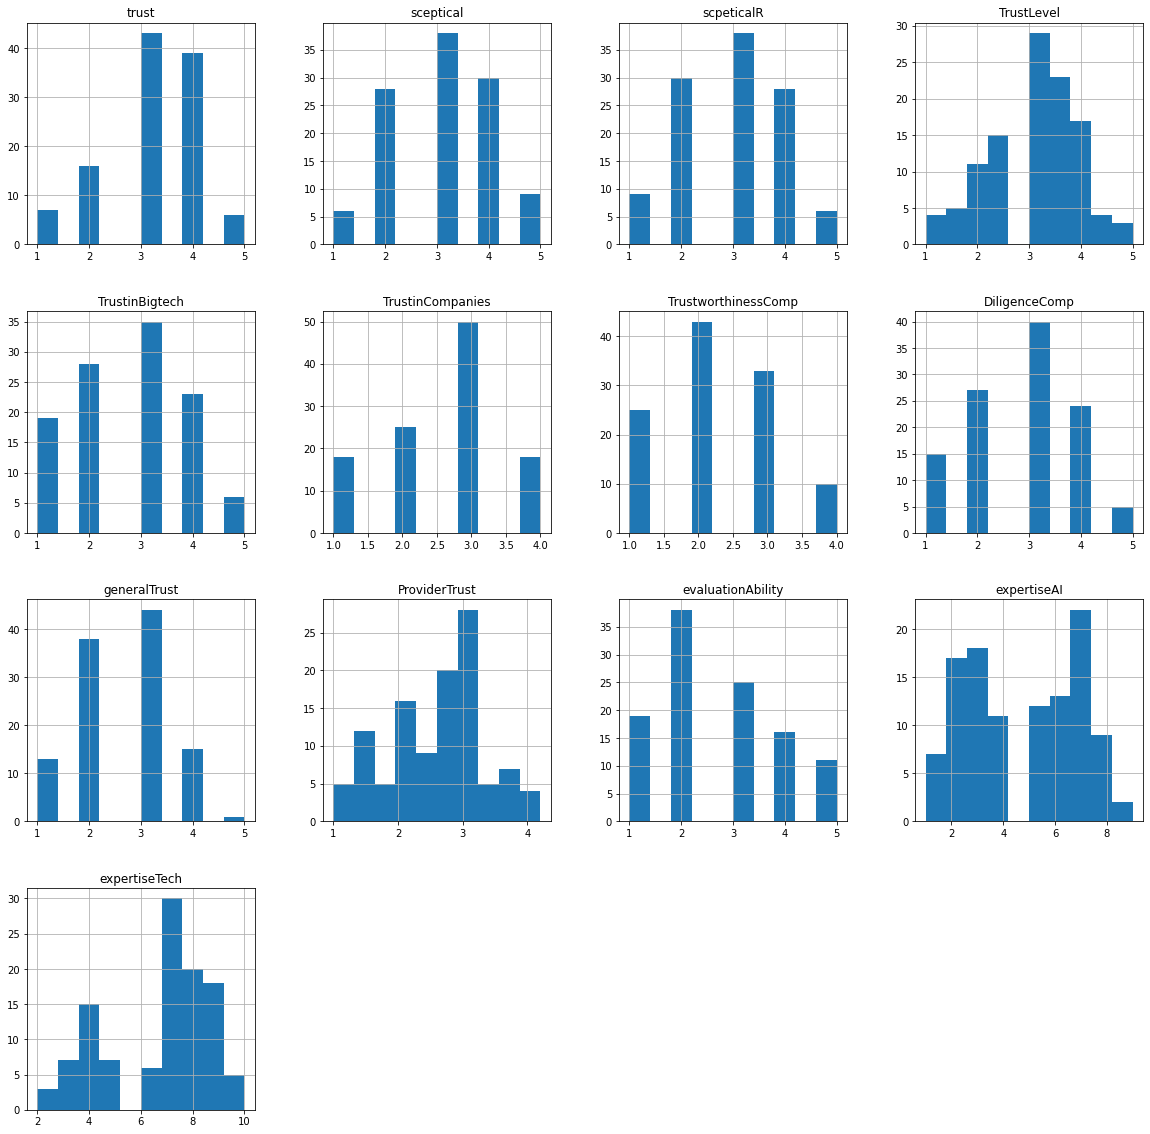

In [ ]:
Dataset[['trust','sceptical','scpeticalR','TrustLevel','TrustinBigtech','TrustinCompanies','TrustworthinessComp','DiligenceComp','generalTrust','ProviderTrust','evaluationAbility','expertiseAI','expertiseTech']].hist(figsize=(20,20))


67 females and 42 males and 2 indifferent

In [ ]:
Dataset['gender'].value_counts()

female         67
male           42
indifferent     2
Name: gender, dtype: int64

Most people who do not trust aut-cars and bots don't use them

In [ ]:
Dataset[['useCar','trustCar','useBot','trustBot']].value_counts()

useCar   trustCar  useBot   trustBot
No       No        no       no          21
Yes      yes       yes      yes         15
                   no       no           9
depends  depends   yes      yes          6
         No        no       no           4
Yes      No        no       no           4
         yes       no       yes          4
depends  depends   no       yes          3
         No        yes      yes          3
Yes      depends   yes      yes          3
No       No        yes      no           3
Yes      depends   yes      no           2
         yes       no       depends      2
         No        yes      yes          2
         depends   no       no           2
                            yes          2
No       No        yes      yes          2
depends  No        no       yes          2
                   yes      no           2
No       No        no       yes          2
depends  depends   no       no           2
                   yes      no           2
No       depends 

In [ ]:
corr_matrix = Dataset[['trust','sceptical','scpeticalR','TrustLevel','TrustinBigtech','TrustinCompanies','TrustworthinessComp','DiligenceComp','generalTrust','ProviderTrust','evaluationAbility','expertiseAI','expertiseTech']].corr()
corr_matrix

,trust,sceptical,scpeticalR,TrustLevel,TrustinBigtech,TrustinCompanies,TrustworthinessComp,DiligenceComp,generalTrust,ProviderTrust,evaluationAbility,expertiseAI,expertiseTech
trust,1.000000,-0.550173,0.550173,0.871904,0.444798,0.567620,0.482499,0.450285,0.343302,0.601048,0.247344,0.152829,0.098861
sceptical,-0.550173,1.000000,-1.000000,-0.888603,-0.524162,-0.641176,-0.406619,-0.413492,-0.299286,-0.604172,-0.084651,-0.021806,-0.047704
scpeticalR,0.550173,-1.000000,1.000000,0.888603,0.524162,0.641176,0.406619,0.413492,0.299286,0.604172,0.084651,0.021806,0.047704
TrustLevel,0.871904,-0.888603,0.888603,1.000000,0.551690,0.687770,0.503470,0.489806,0.364072,0.684433,0.186096,0.096733,0.082276
TrustinBigtech,0.444798,-0.524162,0.524162,0.551690,1.000000,0.600020,0.464258,0.414607,0.416224,0.779039,0.118690,-0.076714,-0.073912
TrustinCompanies,0.567620,-0.641176,0.641176,0.687770,0.600020,1.000000,0.505956,0.530342,0.446472,0.808741,0.158068,-0.103782,-0.029130
TrustworthinessComp,0.482499,-0.406619,0.406619,0.503470,0.464258,0.505956,1.000000,0.614156,0.320573,0.756936,0.202613,-0.028681,0.054208
DiligenceComp,0.450285,-0.413492,0.413492,0.489806,0.414607,0.530342,0.614156,1.000000,0.407919,0.785419,0.006894,-0.094913,-0.128556
generalTrust,0.343302,-0.299286,0.299286,0.364072,0.416224,0.446472,0.320573,0.407919,1.000000,0.667524,-0.011599,-0.019831,-0.186844
ProviderTrust,0.601048,-0.604172,0.604172,0.684433,0.779039,0.808741,0.756936,0.785419,0.667524,1.000000,0.122874,-0.087536,-0.097377


In [ ]:
trust_cor = corr_matrix['trust'].sort_values(ascending=False)

In [ ]:
evaluation_ability = corr_matrix['evaluationAbility'].sort_values(ascending=False)

In [ ]:
evaluation_ability

evaluationAbility      1.000000
expertiseTech          0.460975
expertiseAI            0.365057
trust                  0.247344
TrustworthinessComp    0.202613
TrustLevel             0.186096
TrustinCompanies       0.158068
ProviderTrust          0.122874
TrustinBigtech         0.118690
scpeticalR             0.084651
DiligenceComp          0.006894
generalTrust          -0.011599
sceptical             -0.084651
Name: evaluationAbility, dtype: float64

In [ ]:
trust_cor

trust                  1.000000
TrustLevel             0.871904
ProviderTrust          0.601048
TrustinCompanies       0.567620
scpeticalR             0.550173
TrustworthinessComp    0.482499
DiligenceComp          0.450285
TrustinBigtech         0.444798
generalTrust           0.343302
evaluationAbility      0.247344
expertiseAI            0.152829
expertiseTech          0.098861
sceptical             -0.550173
Name: trust, dtype: float64